Multi-DGENEO MNIST classification

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
import tensorflow as tf

In [2]:
data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [3]:
def get_file_both_h0_h1(path1,path2, indice):
    path_h0_train = path1 + "multiland_output_h0/"
    path_h1_train = path1 + "multiland_output_h1/"
    path_h0_test = path2 + "multiland_output_h0/"
    path_h1_test = path2 + "multiland_output_h1/"
    X_train = []
    X_test = []
    multiland_files_train_h0 = os.listdir(path_h0_train)
    multiland_files_train_h1 = os.listdir(path_h1_train)
    multiland_files_test_h0 = os.listdir(path_h0_test)
    multiland_files_test_h1 = os.listdir(path_h1_test)
    multiland_files_train_h0.sort(key=lambda x: int(x[9:].split('_')[0]))
    multiland_files_train_h1.sort(key=lambda x: int(x[9:].split('_')[0]))
    multiland_files_test_h0.sort(key=lambda x: int(x[9:].split('_')[0]))
    multiland_files_test_h1.sort(key=lambda x: int(x[9:].split('_')[0]))
    for x,y in zip(multiland_files_train_h0,multiland_files_train_h1):
        multi_train_h0 = np.load(path_h0_train+x)[indice]
        multi_train_h1 = np.load(path_h1_train+y)[indice]
        multi_train = np.append(multi_train_h0,multi_train_h1,axis=0)
        X_train.append(multi_train.flatten())

    for z,w in zip(multiland_files_test_h0,multiland_files_test_h1):
        multi_test_h0 = np.load(path_h0_test+z)[indice]
        multi_test_h1 = np.load(path_h1_test+w)[indice]
        multi_test = np.append(multi_test_h0,multi_test_h1,axis=0)
        X_test.append(multi_test.flatten())
    print(len(X_train))
    x_train = np.array(X_train)
    x_test = np.array(X_test)

    """
    LDA
    """
    lr = LDA()
    lr.fit(x_train, y_train)
    print("LDAaccuracy:", lr.score(x_test, y_test))
    """
    LDA+PCA
    """
    pca = PCA(n_components='mle')
    #pca = PCA(n_components=20)
    pca.fit(x_train)
    print("pca.components_",pca.components_.shape)
    x_train_reduction = pca.transform(x_train)
    print("chang_x_train",x_train_reduction.shape)
    x_test_reduction = pca.transform(x_test)
    print("chang_x_test", x_train_reduction.shape)
    lr = LDA()
    lr.fit(x_train_reduction, y_train)
    #test_accuracy_lda_pca.append(lr.score(x_test_reduction, y_test))
    print("pca+lda", lr.score(x_test_reduction, y_test))
    """
    PCA+SVM
    """
    clf_svc = svm.SVC()
    clf_svc.fit(x_train_reduction, y_train)
    #test_svc_pca.append(clf_svc.score(x_test_reduction,y_test))
    print("pca+svc:",clf_svc.score(x_test_reduction,y_test))

In [4]:
path_train = '/home/hjx/Mix_GENEO/train_mnist_multiDGENEO/multiland_output/'
path_test = '/home/hjx/Mix_GENEO/test_mnist_multiDGENEO/multiland_output/'

In [5]:
get_file_both_h0_h1(path_train,path_test, 1)

60000
LDAaccuracy: 0.0981
pca.components_ (235, 1352)
chang_x_train (60000, 235)
chang_x_test (60000, 235)
pca+lda 0.3359
pca+svc: 0.3101


In [6]:
def get_file_h0(path1, path2, indice):
    path_h0_train = path1 + "multiland_output_h0/"
    path_h0_test = path2 + "multiland_output_h0/"
    X_train = []
    X_test = []
    multiland_files_train_h0 = os.listdir(path_h0_train)
    multiland_files_test_h0 = os.listdir(path_h0_test)
    multiland_files_train_h0.sort(key=lambda x: int(x[9:].split('_')[0]))
    multiland_files_test_h0.sort(key=lambda x: int(x[9:].split('_')[0]))
    for x in multiland_files_train_h0:
        multi_train_h0 = np.load(path_h0_train+x)[indice]
        X_train.append(multi_train_h0.flatten())
    for z in multiland_files_test_h0:
        multi_test_h0 = np.load(path_h0_test+z)[indice]
        X_test.append(multi_test_h0.flatten())
    print(len(X_train))
    x_train = np.array(X_train)
    x_test = np.array(X_test)
    
    """
    LDA
    """
    lr = LDA()
    lr.fit(x_train, y_train)
    print("LDAaccuracy:", lr.score(x_test, y_test))
    """
    LDA+PCA
    """
    pca = PCA(n_components='mle')
    #pca = PCA(n_components=20)
    pca.fit(x_train)
    print("pca.components_",pca.components_.shape)
    x_train_reduction = pca.transform(x_train)
    print("chang_x_train",x_train_reduction.shape)
    x_test_reduction = pca.transform(x_test)
    print("chang_x_test", x_train_reduction.shape)
    lr = LDA()
    lr.fit(x_train_reduction, y_train)
    #test_accuracy_lda_pca.append(lr.score(x_test_reduction, y_test))
    print("pca+lda", lr.score(x_test_reduction, y_test))
    """
    PCA+SVM
    """
    clf_svc = svm.SVC()
    clf_svc.fit(x_train_reduction, y_train)
    #test_svc_pca.append(clf_svc.score(x_test_reduction,y_test))
    print("pca+svc:",clf_svc.score(x_test_reduction,y_test))

In [7]:
get_file_h0(path_train,path_test, 1)

60000
LDAaccuracy: 0.0983
pca.components_ (68, 676)
chang_x_train (60000, 68)
chang_x_test (60000, 68)
pca+lda 0.1419
pca+svc: 0.1419


In [8]:
def get_file_h1(path1, path2, indice):
    path_h1_train = path1 + "multiland_output_h1/"
    path_h1_test = path2 + "multiland_output_h1/"
    X_train = []
    X_test = []
    multiland_files_train_h1 = os.listdir(path_h1_train)
    multiland_files_test_h1 = os.listdir(path_h1_test)
    multiland_files_train_h1.sort(key=lambda x: int(x[9:].split('_')[0]))
    multiland_files_test_h1.sort(key=lambda x: int(x[9:].split('_')[0]))
    for x in multiland_files_train_h1:
        multi_train_h1 = np.load(path_h1_train+x)[indice]
        X_train.append(multi_train_h1.flatten())
    for z in multiland_files_test_h1:
        multi_test_h1 = np.load(path_h1_test+z)[indice]
        X_test.append(multi_test_h1.flatten())
    print(len(X_train))
    x_train = np.array(X_train)
    x_test = np.array(X_test)
    
    """
    LDA
    """
    lr = LDA()
    lr.fit(x_train, y_train)
    print("LDAaccuracy:", lr.score(x_test, y_test))
    """
    LDA+PCA
    """
    pca = PCA(n_components='mle')
    #pca = PCA(n_components=20)
    pca.fit(x_train)
    print("pca.components_",pca.components_.shape)
    x_train_reduction = pca.transform(x_train)
    print("chang_x_train",x_train_reduction.shape)
    x_test_reduction = pca.transform(x_test)
    print("chang_x_test", x_train_reduction.shape)
    lr = LDA()
    lr.fit(x_train_reduction, y_train)
    #test_accuracy_lda_pca.append(lr.score(x_test_reduction, y_test))
    print("pca+lda", lr.score(x_test_reduction, y_test))
    """
    PCA+SVM
    """
    clf_svc = svm.SVC()
    clf_svc.fit(x_train_reduction, y_train)
    #test_svc_pca.append(clf_svc.score(x_test_reduction,y_test))
    print("pca+svc:",clf_svc.score(x_test_reduction,y_test))

In [9]:
get_file_h1(path_train,path_test, 1)

60000
LDAaccuracy: 0.3025
pca.components_ (168, 676)
chang_x_train (60000, 168)
chang_x_test (60000, 168)
pca+lda 0.3207
pca+svc: 0.2942


Number 0~9 Mean Multilandscpe

In [10]:

# land_h1_9 = []
for i in range(10):
    locals()['land_train_h0_'+str(i)] = []
    locals()['land_train_h1_'+str(i)] = []
    locals()['land_test_h0_'+str(i)] = []
    locals()['land_test_h1_'+str(i)] = []
multifiles_train_h0=path_train + "multiland_output_h0/"
multifiles_train_h1=path_train + "multiland_output_h1/"

for index, value in enumerate(y_train):
    #print(index)
    indice = 1
    locals()['land_train_h1_'+str(value)].append(np.load(multifiles_train_h1+'x_ctrain_{}_H1.npy'.format(index))[indice])
    locals()['land_train_h0_'+str(value)].append(np.load(multifiles_train_h0+'x_ctrain_{}_H0.npy'.format(index))[indice])

for i in range(10):
    locals()['land_np_train_h0_'+str(i)] = np.array(locals()['land_train_h0_'+str(i)])
    locals()['land_np_train_h1_'+str(i)] = np.array(locals()['land_train_h1_'+str(i)])
    locals()['land_np_train_h0_'+str(i)] = np.mean(locals()['land_np_train_h0_'+str(i)],axis=0)
    locals()['land_np_train_h1_'+str(i)] = np.mean(locals()['land_np_train_h1_'+str(i)],axis=0)


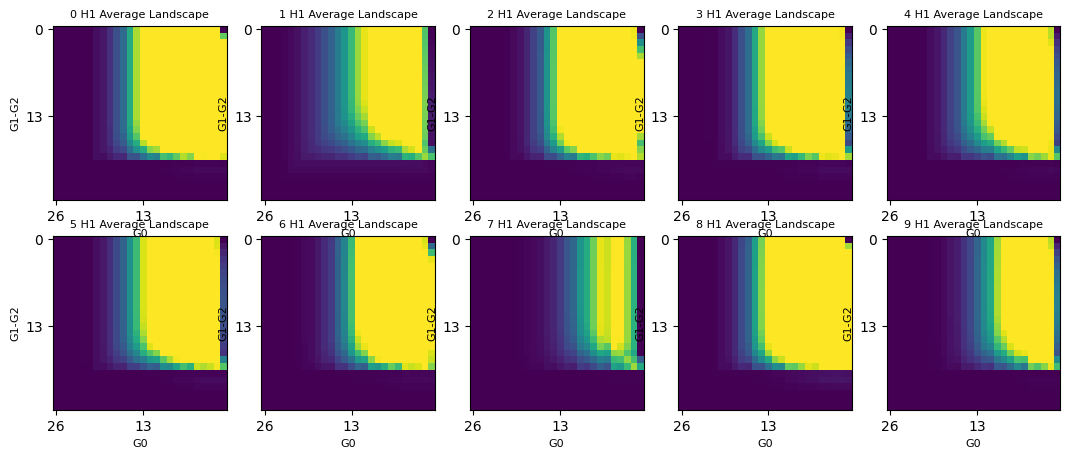

In [11]:
f, axes = plt.subplots(2,5,figsize=(13,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.set_yticks([0,13, 26])
    ax.set_xticks([0,13, 26])
    ax.set_yticklabels([0,13, 26])
    ax.set_xticklabels([26,13, 0])
    ax.set_xlabel("G0",fontsize=8)
    ax.set_ylabel("G1-G2",fontsize=8)
    ax.set_title(f"{i} H1 Average Landscape", fontsize=8)
    #ax.imshow(locals()['land_np_train_h1_'+str(i)], cmap="viridis", vmax=1, vmin=0)
    ax.imshow(locals()['land_np_train_h1_'+str(i)], cmap="viridis",vmax=10,vmin=0)

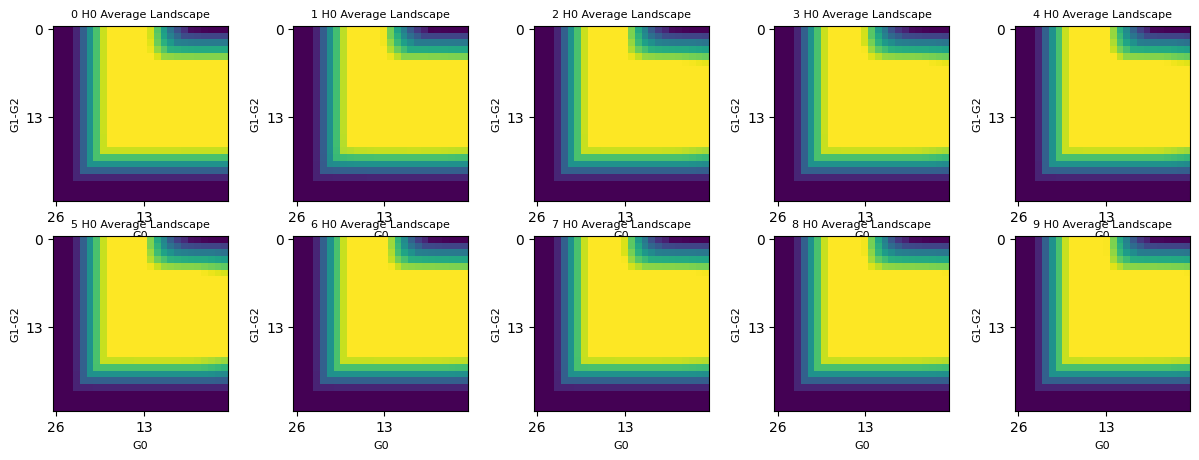

In [12]:
f, axes = plt.subplots(2,5,figsize=(15,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.set_yticks([0,13, 26])
    ax.set_xticks([0,13, 26])
    ax.set_yticklabels([0,13, 26])
    ax.set_xticklabels([26,13, 0])
    ax.set_xlabel("G0",fontsize=8)
    ax.set_ylabel("G1-G2",fontsize=8)
    ax.set_title(f"{i} H0 Average Landscape", fontsize=8)
    #ax.imshow(locals()['land_np_train_h0_'+str(i)], cmap="viridis", vmax=1, vmin=0)
    ax.imshow(locals()['land_np_train_h0_'+str(i)], cmap="viridis",vmax=50, vmin=0)

Binary Classification

In [13]:
from sklearn import svm

multifiles_train_h0=path_train + "multiland_output_h0/"
multifiles_train_h1=path_train + "multiland_output_h1/"
multifiles_test_h0=path_test + "multiland_output_h0/"
multifiles_test_h1=path_test + "multiland_output_h1/"

def compare_number(index1,index2,indice):
    num1_train = np.sum(y_train==index1)
    num2_train = np.sum(y_train==index2)
    num1_test = np.sum(y_test==index1)
    num2_test = np.sum(y_test==index2)
    Y_train = np.zeros(num1_train+num2_train)
    Y_train[num1_train:]=1
    Y_test = np.zeros(num1_test+num2_test)
    Y_test[num1_test:]=1
    Itr1 = np.where(y_train==index1)
    Itr2 = np.where(y_train==index2)
    Ite1 = np.where(y_test==index1)
    Ite2 = np.where(y_test==index2)
    X_train = []
    X_test = []
    for j in Itr1[0]:
        #print(j)
        multi_tr_h0 = np.load(multifiles_train_h0+'x_ctrain_{}_H0.npy'.format(j))[indice]
        multi_tr_h1 = np.load(multifiles_train_h1+'x_ctrain_{}_H1.npy'.format(j))[indice]
        multi_train = np.append(multi_tr_h0,multi_tr_h1,axis=0)
        X_train.append(multi_train.flatten())
        #print(X_tr_h0)
    for j in Itr2[0]:
        multi_tr_h0 = np.load(multifiles_train_h0+'x_ctrain_{}_H0.npy'.format(j))[indice]
        multi_tr_h1 = np.load(multifiles_train_h1+'x_ctrain_{}_H1.npy'.format(j))[indice]
        multi_train = np.append(multi_tr_h0,multi_tr_h1,axis=0)
        X_train.append(multi_train.flatten())
    for j in Ite1[0]:
        multi_te_h0 = np.load(multifiles_test_h0+'x_ctrain_{}_H0.npy'.format(j))[indice]
        multi_te_h1 = np.load(multifiles_test_h1+'x_ctrain_{}_H1.npy'.format(j))[indice]
        multi_test = np.append(multi_te_h0,multi_te_h1,axis=0)
        X_test.append(multi_test.flatten())
    for j in Ite2[0]:
        multi_te_h0 = np.load(multifiles_test_h0+'x_ctrain_{}_H0.npy'.format(j))[indice]
        multi_te_h1 = np.load(multifiles_test_h1+'x_ctrain_{}_H1.npy'.format(j))[indice]
        multi_test = np.append(multi_te_h0,multi_te_h1,axis=0)
        X_test.append(multi_test.flatten())
    """
    LDA
    """
    lr = LDA()
    lr.fit(X_train, Y_train)
    print("LDAaccuracy:", lr.score(X_test, Y_test))
    """
    LDA+PCA
    """
    pca = PCA(n_components='mle')
    pca.fit(X_train)
    print("pca.components_",pca.components_.shape)
    X_train_reduction = pca.transform(X_train)
    print("chang_x_train",X_train_reduction.shape)
    X_test_reduction = pca.transform(X_test)
    print("chang_x_test", X_train_reduction.shape)
    lr = LDA()
    lr.fit(X_train_reduction, Y_train)
    #test_accuracy_lda_pca.append(lr.score(x_test_reduction, y_test))
    print("pca+lda", lr.score(X_test_reduction, Y_test))
    """
    PCA+SVM
    """
    clf_svc = svm.SVC()
    clf_svc.fit(X_train_reduction, Y_train)
    print("svc:", clf_svc.score(X_test_reduction, Y_test))

In [14]:
compare_number(0,1,1)

LDAaccuracy: 0.8879432624113475
pca.components_ (167, 1352)
chang_x_train (12665, 167)
chang_x_test (12665, 167)
pca+lda 0.9560283687943263
svc: 0.8780141843971632


In [15]:
compare_number(6,9,1)

LDAaccuracy: 0.6370106761565836
pca.components_ (181, 1352)
chang_x_train (11867, 181)
chang_x_test (11867, 181)
pca+lda 0.6832740213523132
svc: 0.6654804270462633


In [16]:
compare_number(1,3,1)

LDAaccuracy: 0.7552447552447552
pca.components_ (173, 1352)
chang_x_train (12873, 173)
chang_x_test (12873, 173)
pca+lda 0.7668997668997669
svc: 0.7524475524475525


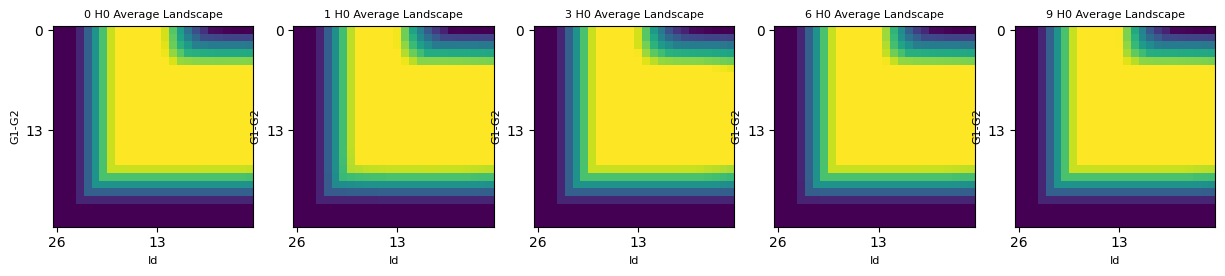

In [17]:
f, axes = plt.subplots(1,5,figsize=(15,5))
L = [0,1,3,6,9]
J=  [1,2,3,4,5]
for l,j in zip(L,J):
    ax = plt.subplot(1,5,j)
    ax.set_yticks([0,13, 26])
    ax.set_xticks([0,13, 26])
    ax.set_yticklabels([0,13, 26])
    ax.set_xticklabels([26,13, 0])
    ax.set_xlabel("Id",fontsize=8)
    ax.set_ylabel("G1-G2",fontsize=8)
    ax.set_title(f"{l} H0 Average Landscape", fontsize=8)
    ax.imshow(locals()['land_np_train_h0_'+str(l)], cmap="viridis", vmax=50, vmin=0)

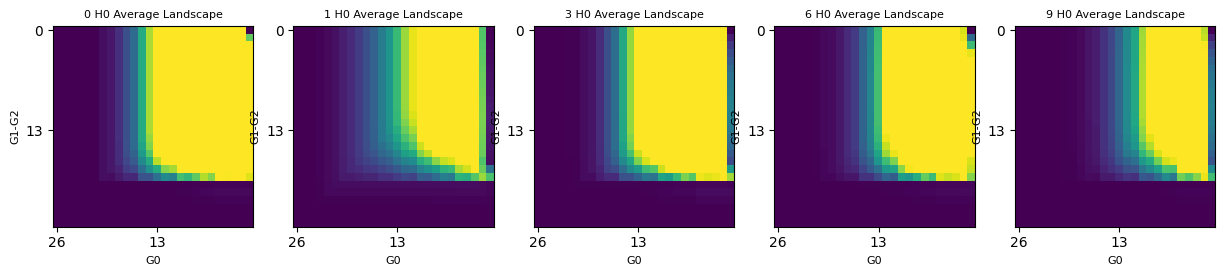

In [18]:
f, axes = plt.subplots(1,5,figsize=(15,5))
L = [0,1,3,6,9]
J=  [1,2,3,4,5]
for l,j in zip(L,J):
    ax = plt.subplot(1,5,j)
    ax.set_yticks([0,13, 26])
    ax.set_xticks([0,13, 26])
    ax.set_yticklabels([0,13, 26])
    ax.set_xticklabels([26,13, 0])
    ax.set_xlabel("G0",fontsize=8)
    ax.set_ylabel("G1-G2",fontsize=8)
    ax.set_title(f"{l} H0 Average Landscape", fontsize=8)
    ax.imshow(locals()['land_np_train_h1_'+str(l)], cmap="viridis", vmax=10, vmin=0)

In [19]:
from sklearn import svm

multifiles_train_h0=path_train + "multiland_output_h0/"
multifiles_test_h0=path_test + "multiland_output_h0/"

def compare_number_h0(index1,index2,indice):
    num1_train = np.sum(y_train==index1)
    num2_train = np.sum(y_train==index2)
    num1_test = np.sum(y_test==index1)
    num2_test = np.sum(y_test==index2)
    Y_train = np.zeros(num1_train+num2_train)
    Y_train[num1_train:]=1
    Y_test = np.zeros(num1_test+num2_test)
    Y_test[num1_test:]=1
    Itr1 = np.where(y_train==index1)
    Itr2 = np.where(y_train==index2)
    Ite1 = np.where(y_test==index1)
    Ite2 = np.where(y_test==index2)
    X_train = []
    X_test = []
    for j in Itr1[0]:
        #print(j)
        multi_tr_h0 = np.load(multifiles_train_h0+'x_ctrain_{}_H0.npy'.format(j))[indice]
        X_train.append(multi_tr_h0.flatten())
        #print(X_tr_h0)
    for j in Itr2[0]:
        multi_tr_h0 = np.load(multifiles_train_h0+'x_ctrain_{}_H0.npy'.format(j))[indice]
        X_train.append(multi_tr_h0.flatten())
    for j in Ite1[0]:
        multi_te_h0 = np.load(multifiles_test_h0+'x_ctrain_{}_H0.npy'.format(j))[indice]
        X_test.append(multi_te_h0.flatten())
    for j in Ite2[0]:
        multi_te_h0 = np.load(multifiles_test_h0+'x_ctrain_{}_H0.npy'.format(j))[indice]
        X_test.append(multi_te_h0.flatten())
    """
    LDA
    """
    lr = LDA()
    lr.fit(X_train, Y_train)
    print("LDAaccuracy:", lr.score(X_test, Y_test))
    """
    LDA+PCA
    """
    pca = PCA(n_components='mle')
    #pca = PCA(n_components=20)
    pca.fit(X_train)
    print("pca.components_",pca.components_.shape)
    X_train_reduction = pca.transform(X_train)
    print("chang_x_train",X_train_reduction.shape)
    X_test_reduction = pca.transform(X_test)
    print("chang_x_test", X_train_reduction.shape)
    lr = LDA()
    lr.fit(X_train_reduction, Y_train)
    #test_accuracy_lda_pca.append(lr.score(x_test_reduction, y_test))
    print("pca+lda", lr.score(X_test_reduction, Y_test))
    """
    PCA+SVM
    """
    clf_svc = svm.SVC()
    clf_svc.fit(X_train_reduction, Y_train)
    print("svc:", clf_svc.score(X_test_reduction, Y_test))

In [20]:
compare_number_h0(0,1,1)

LDAaccuracy: 0.577304964539007
pca.components_ (52, 676)
chang_x_train (12665, 52)
chang_x_test (12665, 52)
pca+lda 0.6033096926713948
svc: 0.6023640661938534


In [21]:
compare_number_h0(1,3,1)

LDAaccuracy: 0.5972027972027972
pca.components_ (52, 676)
chang_x_train (12873, 52)
chang_x_test (12873, 52)
pca+lda 0.5836829836829837
svc: 0.593939393939394


In [22]:
compare_number_h0(6,9,1)

LDAaccuracy: 0.5205897305541434
pca.components_ (45, 676)
chang_x_train (11867, 45)
chang_x_test (11867, 45)
pca+lda 0.5165226232841891
svc: 0.543467208947636


In [23]:
from sklearn import svm

multifiles_train_h1=path_train + "multiland_output_h1/"
multifiles_test_h1=path_test + "multiland_output_h1/"

def compare_number_h1(index1,index2,indice):
    num1_train = np.sum(y_train==index1)
    num2_train = np.sum(y_train==index2)
    num1_test = np.sum(y_test==index1)
    num2_test = np.sum(y_test==index2)
    Y_train = np.zeros(num1_train+num2_train)
    Y_train[num1_train:]=1
    Y_test = np.zeros(num1_test+num2_test)
    Y_test[num1_test:]=1
    Itr1 = np.where(y_train==index1)
    Itr2 = np.where(y_train==index2)
    Ite1 = np.where(y_test==index1)
    Ite2 = np.where(y_test==index2)
    X_train = []
    X_test = []
    for j in Itr1[0]:
        #print(j)
        multi_tr_h1 = np.load(multifiles_train_h1+'x_ctrain_{}_H1.npy'.format(j))[indice]
        X_train.append(multi_tr_h1.flatten())
        #print(X_tr_h0)
    for j in Itr2[0]:
        multi_tr_h1 = np.load(multifiles_train_h1+'x_ctrain_{}_H1.npy'.format(j))[indice]
        X_train.append(multi_tr_h1.flatten())
    for j in Ite1[0]:
        multi_te_h1 = np.load(multifiles_test_h1+'x_ctrain_{}_H1.npy'.format(j))[indice]
        X_test.append(multi_te_h1.flatten())
    for j in Ite2[0]:
        multi_te_h1 = np.load(multifiles_test_h1+'x_ctrain_{}_H1.npy'.format(j))[indice]
        X_test.append(multi_te_h1.flatten())
    """
    LDA
    """
    lr = LDA()
    lr.fit(X_train, Y_train)
    print("LDAaccuracy:", lr.score(X_test, Y_test))
    """
    LDA+PCA
    """
    pca = PCA(n_components='mle')
    #pca = PCA(n_components=20)
    pca.fit(X_train)
    print("pca.components_",pca.components_.shape)
    X_train_reduction = pca.transform(X_train)
    print("chang_x_train",X_train_reduction.shape)
    X_test_reduction = pca.transform(X_test)
    print("chang_x_test", X_train_reduction.shape)
    lr = LDA()
    lr.fit(X_train_reduction, Y_train)
    #test_accuracy_lda_pca.append(lr.score(x_test_reduction, y_test))
    print("pca+lda", lr.score(X_test_reduction, Y_test))
    """
    PCA+SVM
    """
    clf_svc = svm.SVC()
    clf_svc.fit(X_train_reduction, Y_train)
    print("svc:", clf_svc.score(X_test_reduction, Y_test))

In [24]:
compare_number_h1(0,1,1)

LDAaccuracy: 0.8780141843971632
pca.components_ (115, 676)
chang_x_train (12665, 115)
chang_x_test (12665, 115)
pca+lda 0.9555555555555556
svc: 0.875177304964539


In [25]:
compare_number_h1(1,3,1)

LDAaccuracy: 0.7337995337995338
pca.components_ (121, 676)
chang_x_train (12873, 121)
chang_x_test (12873, 121)
pca+lda 0.744988344988345
svc: 0.7356643356643356


In [26]:
compare_number_h1(6,9,1)

LDAaccuracy: 0.6705643111337062
pca.components_ (136, 676)
chang_x_train (11867, 136)
chang_x_test (11867, 136)
pca+lda 0.6802236908998475
svc: 0.6700559227249618
